# Give me some credit

## 1st attempt

In [1]:
import pandas as pd

In [2]:
datapath = 'data/'

In [3]:
import os
os.listdir('data/')

['.DS_Store',
 'cs-test.csv',
 'cs-training.csv',
 'Data Dictionary.xls',
 'prediction.csv',
 'sampleEntry.csv']

In [4]:
fname = 'cs-training.csv'
data = pd.read_csv(datapath + fname, index_col=0)

In [5]:
data.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
Y=data['SeriousDlqin2yrs']

In [7]:
X=data.drop('SeriousDlqin2yrs', axis=1)

In [8]:
Y.count() == len(Y)

True

### so there is no missing value for Y

In [9]:
X.count()

RevolvingUtilizationOfUnsecuredLines    150000
age                                     150000
NumberOfTime30-59DaysPastDueNotWorse    150000
DebtRatio                               150000
MonthlyIncome                           120269
NumberOfOpenCreditLinesAndLoans         150000
NumberOfTimes90DaysLate                 150000
NumberRealEstateLoansOrLines            150000
NumberOfTime60-89DaysPastDueNotWorse    150000
NumberOfDependents                      146076
dtype: int64

### There are some missing values for X so you have to fill in something

In [10]:
data['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [11]:
data[data['MonthlyIncome'].isnull()]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
7,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0
9,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
17,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
33,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
42,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0
53,0,1.000000,62,0,0.0,NaN,1,0,0,0,0.0
59,0,0.541109,43,0,2477.0,NaN,3,0,1,0,2.0
63,0,0.101156,72,0,1720.0,NaN,12,0,2,0,0.0
72,0,0.142013,67,0,1824.0,NaN,7,0,2,0,0.0
87,0,0.360510,58,1,3282.0,NaN,8,0,2,0,0.0


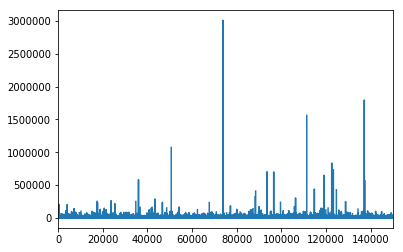

In [12]:
%matplotlib inline
data['MonthlyIncome'].plot()

In [13]:
X['MissingIncome'] = X['MonthlyIncome'].isnull().apply(lambda b: int(b))

In [14]:
def replace_nan_minus1(x):
    if pd.isnull(x):
        return -1
    else:
        return x
    
X['MonthlyIncome'] = X['MonthlyIncome'].apply(replace_nan_minus1)

In [16]:
X.count()

RevolvingUtilizationOfUnsecuredLines    150000
age                                     150000
NumberOfTime30-59DaysPastDueNotWorse    150000
DebtRatio                               150000
MonthlyIncome                           150000
NumberOfOpenCreditLinesAndLoans         150000
NumberOfTimes90DaysLate                 150000
NumberRealEstateLoansOrLines            150000
NumberOfTime60-89DaysPastDueNotWorse    150000
NumberOfDependents                      146076
MissingIncome                           150000
dtype: int64

In [17]:
X['NumberOfDependents'].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

In [18]:
X['NumberOfDependents'].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [19]:
def replace_nan_0(x):
    if pd.isnull(x):
        return 0
    else:
        return x
    
X['NumberOfDependents'] = X['NumberOfDependents'].apply(replace_nan_0)

In [20]:
X.count()

RevolvingUtilizationOfUnsecuredLines    150000
age                                     150000
NumberOfTime30-59DaysPastDueNotWorse    150000
DebtRatio                               150000
MonthlyIncome                           150000
NumberOfOpenCreditLinesAndLoans         150000
NumberOfTimes90DaysLate                 150000
NumberRealEstateLoansOrLines            150000
NumberOfTime60-89DaysPastDueNotWorse    150000
NumberOfDependents                      150000
MissingIncome                           150000
dtype: int64

In [21]:
X.dtypes

RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
MissingIncome                             int64
dtype: object

## Train models

In [22]:
import sklearn
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X,Y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
y_predict = lr.predict(X)

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y, y_predict)

0.058907536249796784

In [27]:
thre = .5
ypredict = (lr.predict(X) < thre).astype(int)

## predict

In [28]:
Xtest = pd.read_csv(datapath + 'cs-test.csv', index_col=0).drop('SeriousDlqin2yrs', axis=1)

In [29]:
Xtest.head(5)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [30]:
Xtest['MissingIncome'] = Xtest['MonthlyIncome'].isnull().apply(lambda b: int(b))
Xtest['MonthlyIncome'] = Xtest['MonthlyIncome'].apply(replace_nan_minus1)
Xtest['NumberOfDependents'] = Xtest['NumberOfDependents'].apply(replace_nan_0)

In [31]:
ytest = (lr.predict(Xtest) < thre).astype(int)

In [32]:
Xtest['Probability'] = ytest

In [33]:
Xtest['Id'] = Xtest.index

In [34]:
submission =Xtest[['Id', 'Probability']]

In [35]:
submission.to_csv('submission.csv')

In [36]:
submission.index.name = 'Id'

In [37]:
submission = submission.drop('Id', axis=1)

In [38]:
submission.to_csv('submission.csv')

## Support vector regression

In [39]:
from sklearn import svm
from sklearn import linear_model
clf = linear_model.SGDClassifier()
clf.fit(X, Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [44]:
Xtest = pd.read_csv(datapath + 'cs-test.csv', index_col=0).drop('SeriousDlqin2yrs', axis=1)
Xtest['MissingIncome'] = Xtest['MonthlyIncome'].isnull().apply(lambda b: int(b))
Xtest['MonthlyIncome'] = Xtest['MonthlyIncome'].apply(replace_nan_minus1)
Xtest['NumberOfDependents'] = Xtest['NumberOfDependents'].apply(replace_nan_0)
ytest = clf.predict(Xtest)

In [45]:
Xtest['Probability'] = ytest
Xtest['Id'] = Xtest.index
submission =Xtest[['Id', 'Probability']]
submission.to_csv('submission.csv')
submission.index.name = 'Id'
submission = submission.drop('Id', axis=1)
submission.to_csv('submission.csv')

In [48]:
max(ytest)

1

## Logistic Regression 

In [40]:
Xtest = pd.read_csv(datapath + 'cs-test.csv', index_col=0).drop('SeriousDlqin2yrs', axis=1)
Xtest['MissingIncome'] = Xtest['MonthlyIncome'].isnull().apply(lambda b: int(b))
Xtest['MonthlyIncome'] = Xtest['MonthlyIncome'].apply(replace_nan_minus1)
Xtest['NumberOfDependents'] = Xtest['NumberOfDependents'].apply(replace_nan_0)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logreg =LogisticRegression()
logreg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
logredpreds = logreg.predict_proba(Xtest)[:, 1]

In [44]:
ytest = logredpreds

In [45]:
Xtest['Probability'] = ytest
Xtest['Id'] = Xtest.index
submission =Xtest[['Id', 'Probability']]
submission.to_csv('submission.csv')
submission.index.name = 'Id'
submission = submission.drop('Id', axis=1)
submission.to_csv('submission.csv')

In [46]:
ytest

array([ 0.06946949,  0.04355824,  0.03905518, ...,  0.02427644,
        0.02331207,  0.10631608])

# Experiment With Alex 

In [15]:
data_sto = data.sample(frac=0.2)

In [16]:
data_sto.shape

(30000, 11)

In [17]:
Y_sto = data_sto['SeriousDlqin2yrs']
X_sto = data_sto.drop('SeriousDlqin2yrs', axis=1)
X_sto['MissingIncome'] = X_sto['MonthlyIncome'].isnull().apply(lambda b: int(b))

In [18]:
def replace_nan_minus1(x):
    if pd.isnull(x):
        return -1
    else:
        return x
    
X_sto['MonthlyIncome'] = X_sto['MonthlyIncome'].apply(replace_nan_minus1)

In [19]:
def replace_nan_0(x):
    if pd.isnull(x):
        return 0
    else:
        return x
    
X_sto['NumberOfDependents'] = X_sto['NumberOfDependents'].apply(replace_nan_0)

In [20]:
# tuned_parameters = [
#     {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
#     ]

In [22]:
tuned_parameters = [
    {'C':[1000], 'kernel': ['rbf'], 'gamma': [0.00005 ,0.00001]},
    ]

In [23]:
# tuned_parameters = [

#     {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},

#     ]
# tuned_parameters = [

#     {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}

#     ]


In [ ]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

clf = GridSearchCV(
    SVC(probability=True), # 識別器
    tuned_parameters, # 最適化したいパラメータセット 
    cv=5, # 交差検定の回数
    scoring='roc_auc' ) # モデルの評価関数の指定

clf.fit(X_sto, Y_sto)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
clf.grid_scores_

In [ ]:
clf.best_params_

In [ ]:
Xtest = pd.read_csv(datapath + 'cs-test.csv', index_col=0).drop('SeriousDlqin2yrs', axis=1)
Xtest['MissingIncome'] = Xtest['MonthlyIncome'].isnull().apply(lambda b: int(b))
Xtest['MonthlyIncome'] = Xtest['MonthlyIncome'].apply(replace_nan_minus1)
Xtest['NumberOfDependents'] = Xtest['NumberOfDependents'].apply(replace_nan_0)

In [ ]:
ypredict_sto = clf.predict_proba(Xtest)

In [ ]:
Xtest['Probability'] = ypredict_sto[:, 1]
Xtest['Id'] = Xtest.index
submission =Xtest[['Id', 'Probability']]

In [ ]:
submission.to_csv('submission.csv')
submission.index.name = 'Id'
submission = submission.drop('Id', axis=1)
submission.to_csv('submission.csv')

In [ ]:
submission

In [ ]:
min(ypredict_sto[:, 1])